<a href="https://colab.research.google.com/github/kjm9198/Fast-API-Project/blob/main/GRK_MP5A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zadanie na 3 - Środowisko pracy

Jest bardzo proste - jeżeli tu Państwo dotarli, to wystarczy przejść do pola poniżej i nacisnąć SHIFT+ENTER. Polecenia Pythona wykonają się, a poniżej będziecie Państwo widzieć ich rezultat, czyli powinien się pojawić państwa login. Taki plik można następnie zapisać korzystając z menu File -> Save i dołączyć do Assignmentu w Teams jako rezultat pracy na 3.

Polecenie będzie chciało dostępu do Google API, tak aby odczytać dane tokenu uwierzytelniającego Państwa dostępu do Google Drive. Za pierwszym uruchomieniem, konieczne będzie potwierdzenie dostępu przeklikując się przez dialog zainicjowany pojawieniem się okna wyglądającego mniej więcej tak:

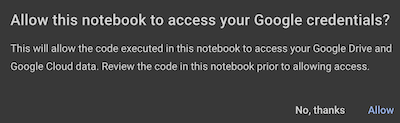

Spodziewanym rezultatem działania kodu powinno być wypisanie emaila przypisanego do Państwa konta bezpośrednio poniżej okna z kodem.

In [3]:
# @title Default title text
from google.colab import auth
import requests

auth.authenticate_user()
gcloud_token = !gcloud auth print-access-token
gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
print(gcloud_tokeninfo["email"])

s24864@pjwstk.edu.pl


# Tablice w NumPy

Do wykonywania podstawowych operacji na tablicach numerycznych będziemy stosować dostępną w Pythonie bibliotekę NumPy. Udostępnia ona wiele operacji na tablicach, dodatkowo, ze względu na implementację, jest szybka.

Abyśmy mogli z niej w dalszym naszym kodzie korzystać, musimy najpierw ją zaimportować poleceniem *import*. Aby ułatwić w dalszej pracy wskazywanie jej komponentów, definiujemy też dla niej skrót, zwyczajowo jest to *np* za pomocą słówka kluczowego *as*:

In [4]:
import numpy as np

Teraz możemy już utworzyć nową, 2-wymiarową tablicę korzystając z funkcji array biblioteki NumPy (którą wywołujemy przez wskazanie jej w notacji: biblioteka.funkcja, czyli w tym przypadku *numpy.array*, lub korzystając z naszego skrótu, *np.array*), a jako parametry, w formie kolejno podawanych list, przekazujemy do niej sekwencje wartości dla poszczególnych wierszy tej tablicy:


In [5]:
arr = np.array( [[ 0, 1, 0],
                 [ 1, 2, 1],
                 [ 3, 4, 5]] )

print(arr)

[[0 1 0]
 [1 2 1]
 [3 4 5]]


Pojedyncze jej elementy adresujemy wskazujac jako indeks najpierw numer wiersza, a potem kolumny:


In [6]:
print(arr[2,1])

4


Możemy też jako wycinek (slice) zdefiniować całą wybraną kolumnę, wtedy jako wybór rzędów podajemy pojedynczy znak dwukropka, oznaczający w tym przypadku "wszystkie wiersze", a jako kolumnę indeks wybranej kolumny (pamiętamy, że numerujemy od 0):

In [7]:
print(arr[:,2])

[0 1 5]


Analogicznie, możemy też z tablicy wybrać interesujące nas wiersze (pierwszy wiersz ma indeks 0). Specyfikując ich zakres jako n:m otrzymamy wiersze o numerach od 0 do m-1, jak na przykładzie poniżej:

In [8]:
print(arr[:2,:])

[[0 1 0]
 [1 2 1]]


Wartości w tablicy możemy nie tylko odczytywać, ale również zmieniać, indeksując tablicę po współrzędnych i przypisując wartość na zadanej pozycji:

In [9]:
arr[1,2] = 7
print(arr)

[[0 1 0]
 [1 2 7]
 [3 4 5]]


Obiekty typu ndarray, jakimi są nasze tablice, mają atrybut "shape", który informuje o rozmiarach tablicy, w naszym przypadku jest to rozmiar 3 wiersze na 3 kolumny:

In [10]:
print(arr.shape)

(3, 3)


Sprawdźmy to jeszcze na tablicy, która ma bardziej charakterystyczny kształt. W przypadku ostatniej instrukcji *print* wykorzystujemy w tym przypadku tzw. *f-stringi*, które umożliwiają nam wstrzyknięcie wartości zwracanej przez inny obiekt w środek naszego wypisywanego ciągu znakowego:

In [11]:
different_arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
print("Tak wygląda nowa tablica:")
print(different_arr)
print(f"A oto jej kształt: {different_arr.shape}")

Tak wygląda nowa tablica:
[[1 2 3 4]
 [5 6 7 8]]
A oto jej kształt: (2, 4)


Wykorzystując te informacje, możemy np. przeiterować po wszystkich elementach tablicy, adresując je po kolei w dwóch pętlach, a do kontrolowania zakresu zmiany indeksujących te operacje zmiennych wykorzystamy odpowiednio pierwszą (z indeksem 0) i drugą (z indeksem 1) wartość rozmiaru tablicy zwracanego przez atrybut *shape*:


In [12]:
for rzad in range(arr.shape[0]):
    for kolumna in range(arr.shape[1]):
        print(f'Element {rzad},{kolumna} to {arr[rzad,kolumna]}')

Element 0,0 to 0
Element 0,1 to 1
Element 0,2 to 0
Element 1,0 to 1
Element 1,1 to 2
Element 1,2 to 7
Element 2,0 to 3
Element 2,1 to 4
Element 2,2 to 5


Kształt tablicy możemy łatwo modyfikować, ogranizując treść w tablicę o różnych wymiarach, stosując metodę reshape i podając jako parametry nowe rozmiary tablicy.

Proszę zwrócic uwagę, że ilość elementów w tablicy musi odpowiadać wielkości tablicy w nowym kształcie, tak żeby dane dały się zorganizować w wybrany kształt. Jeżeli tak nie jest, otrzymamy błąd *ValueError: cannot reshape...*

W celu bardziej eleganckiego formatowania, użyłem w ciągu znaków sekwencji kontrolnej *\n* oznaczającej nową linię.

In [13]:
arr2 = np.array(range(16))

print('Tablica jednowymiarowa:\n')
print(arr2)
print('\nTablica dwuwymiarowa:\n')
print(arr2.reshape(4,4))
print('\nTablica trójwymiarowa:\n')
print(arr2.reshape(4,2,2))

Tablica jednowymiarowa:

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]

Tablica dwuwymiarowa:

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

Tablica trójwymiarowa:

[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]

 [[12 13]
  [14 15]]]


Wycinanie fragmentu tablicy (slicing) działa analogicznie dla tablic o wielu wymiarach, w nawiasach kwadratowych podejmy, indeksując, wartości kolejnych indeksów dla kolejnych wymiarów tablicy:

In [14]:
arr3 = arr2.reshape(4,2,2)

print('\nWycinek [1,:,:]:\n')
print(arr3[1,:,:])
print('\nWycinek [1,1,:]:\n')
print(arr3[1,1,:])
print('\nPojedynczy element na pozycji [1,1,0]:\n')
print(arr3[1,1,0])


Wycinek [1,:,:]:

[[4 5]
 [6 7]]

Wycinek [1,1,:]:

[6 7]

Pojedynczy element na pozycji [1,1,0]:

6


Funkcję w Pythonie definiujemy z wykorzystaniem słowa kluczowego *def*. W nawiasach okrągłych podajemy listę parametrów, jakie przyjmować ma nasza funkcja, a następnie, po wcięciu, definiujemy sekwencję instrukcji do wykonania w jej wnętrzu. Jeżeli funkcja zwraca jakiś rezultat swojej pracy, przekazujemy go za pomocą słowa kluczowego *return*.

Jeżeli chcemy opisać działanie funkcji, albo jakieś jej kluczowe parametry, to możemy do tego wykorzystać tzw. docstringi, czyli sekwencje trzech znaków ", pomiędzy którymi umieszczamy nasz tekst. Z takich docstringów potrafią korzystać narzędzia ułatwiające pracę z kodem, podpowiadając składnie i zastosowanie funkcji które próbujemy potem stosować w naszym kodzie.

Przykłady funkcji:

In [15]:
def dodaj(a, b):
  """
  Funkcja przyjmuje dwa parametry, a następnie zwraca wynik ich dodawania.

  Argumenty:
   a - to jest pierwszy parametr
   b - a to jest drugi parametr
  """
  return a + b


print(dodaj(2, 10))

12


Chociaż nie ma takiego obowiązku, dobrze jest wskazywać przy definiowaniu funkcji, jakich typów danych się spodziewamy, i jakiego typu jest zwracany przez nią rezultat pracy (o ile jest). Stosowanie tego zwyczaju w praktyce zwiększy czytelność kodu, a także umożliwi działanie mechanizmom sprawdzającym poprawność kodu jakie wbudowane są w rozmaite środowiska programistyczne z których możecie Państwo chcieć korzystać w przyszłości:

In [16]:
def przywitaj(imie: str) -> None:
  print(f"Czesc {imie}!")


przywitaj("Maciej")

Czesc Maciej!


W poniższym przykładzie w ostatniej linijce zastosowałem funkcję bezpośrednio, nie wykorzystując do wypisywania zwracanego przez nią rezultatu funkcji *print*. W takim przypadku, jeżeli ostatnia z wykonywanych instrukcji w sekwencji kodu zwraca jakiś rezultat, ten rezultat wypisywany jest bezpośrednio przez Notebook na ekran. Ułatwia to pracę z naszym kodem.

W funkcji też wprowadziłem domyślną wartość dla parametru *mnoznik*, w tym przypadku jest to wartość 2 i będzie ona użyta o ile nie podano jej przy wywoływaniu funkcji.

In [17]:
def pomnoz_tablice(tablica: np.ndarray, mnoznik:int = 2) -> np.ndarray:
  return tablica * mnoznik


arr = np.array([[1, 2], [3, 4]])
pomnoz_tablice(arr)

array([[2, 4],
       [6, 8]])

Proszę zauważyć, że działa to tylko dla ostatniej wykonywanej instrukcji, czyli jeżeli chcielibyśmy wywołać ich kilka, to wynik poprzednich musimy wypisać sobie w inny sposób (np. korzystając z *print*):

In [18]:
pomnoz_tablice(arr, 3)
pomnoz_tablice(arr, 4)

array([[ 4,  8],
       [12, 16]])

Zmienne jakimi chcemy indeksować tablicę NumPy muszą być typu *int*, w przeciwnym wypadku zwrócony zostanie błąd.

In [19]:
indeks = 10
print(indeks)
print(type(indeks))
indeks = indeks / 2
print(indeks)
print(type(indeks))

10
<class 'int'>
5.0
<class 'float'>


W powyższym przypadku, operacje na zmiennej indeks, początkowo przechowującej wartości *int* spowodowały, że zmieniła ona swój typ na *float*, czyli na wartości zmiennoprzecinkowe.

Gdybyśmy teraz spróbowali zaindeksować tym jakąś tablicę NumPy, dostalibyśmy błąd, więc musimy skonwertować ją z powrotem na typ *int*:

In [20]:
int(indeks)
print(type(indeks))
indeks = int(indeks)
print(type(indeks))

arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])
arr[indeks:]

<class 'float'>
<class 'int'>


array([6, 7, 8])

# Zadanie na 3.5 - Funkcja wycinająca środek zadanej tablicy dwuwymiarowej

Korzystając z mechanizmów przetestowanych powyżej, stwórz funkcję, która tworzy wycinek podanej tablicy typu *np.ndarray* taki że rozmiar wycinka jest 4 razy mniejszy (czyli ma 2 razy mniej kolumn i 2 razy mniej wierszy, z dokładnością do ewentualnych zaokrągleń jeżeli współrzędne x lub y nie są parzyste) a treść pobierana jest ze środka (z dokładnością do ewentualnych zaokrągleń) tablicy źródłowej. Funkcja powinna zwracać wycinek w formie nowej tablicy *np.ndarray*.

Przetestuj działanie funkcji w polu następującym po polu w którym wprowadzisz swoje rozwiązanie.

In [21]:
def wytnij_srodek(tablica_zrodlowa: np.ndarray) -> np.ndarray:

    nowy_wiersze = tablica_zrodlowa.shape[0] // 2
    nowe_kolumny = tablica_zrodlowa.shape[1] // 2

    start_wiersza = (tablica_zrodlowa.shape[0] - nowy_wiersze) // 2
    koniec_wiersza = start_wiersza + nowy_wiersze

    start_kolumny = (tablica_zrodlowa.shape[1] - nowe_kolumny) // 2
    koniec_kolumny = start_kolumny + nowe_kolumny

    tablica_wynikowa = tablica_zrodlowa[start_wiersza:koniec_wiersza, start_kolumny:koniec_kolumny]

    return tablica_wynikowa

In [ ]:
tablica_testowa = np.array([[0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0],
                            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                            [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 1, 1],
                            [1, 1, 3, 3, 3, 5, 5, 5, 5, 2, 2, 1],
                            [0, 1, 4, 5, 8, 9, 9, 7, 3, 2, 1, 0],
                            [0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 8, 8],
                            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                            [0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0]])

wytnij_srodek(tablica_testowa)

array([[2, 3, 3, 4, 4, 5],
       [3, 3, 5, 5, 5, 5],
       [5, 8, 9, 9, 7, 3],
       [3, 4, 5, 6, 7, 8]])

Rezultat działania powinien dać następującą tablicę:

```
array([[2, 3, 3, 4, 4, 5],
       [3, 3, 5, 5, 5, 5],
       [5, 8, 9, 9, 7, 3],
       [3, 4, 5, 6, 7, 8]])
```



# OpenCV i podstawowe operacje na obrazach

OpenCV jest biblioteką umożliwiającą łatwą manipulację obrazami z poziomu Pythona. Jeżeli nie została zainstalowana w środowisku Python w którym Państwo pracujecie, należy dodać ją jako paczkę za pomocą *pip*.

Aby uruchomić *pip* z poziomu Jupyter Notebook, trzeba poprzedzić komendę znakiem wykrzyknika, który umożliwia nam wykonanie polecenia powłoki (shell) z poziomu sekcji kodu:


In [22]:
!pip install opencv-python

W tym przypadku widzimy, ze paczka opencv-python jest już częścią standardowej dystrybucji ("Requirement already satisfied"), więc ten krok nie był nam potrzebny.
Ale dla innych pakietów lub w innym środowisku może być konieczny, więc warto o nim wspomnieć.

Możemy więc zaimportować bibliotekę OpenCV.
Importujemy również poprawioną funkcję *cv2_imshow*, która zapewni nam właściwe wyświetlanie obrazu w środowisku Jupyter Notebook w ramach Google Col
aboratory (będziemy ją stosować zamiast zwyczajowej funkcji *cv2.imshow*).

In [23]:
import cv2
from google.colab.patches import cv2_imshow

Aby wykonywać jakieś operacje na obrazach, musimy najpierw zapewnić naszemu środowisku dostęp do nich. Jedną z metod, jaką się posłużymy, jest wgranie obrazów do przestrzeni roboczej Google Colaboratory korzystając z *files.upload()*. Otwiera ona dialog pod oknem z kodem, gdzie możemy dokonać wyboru plików, jakie zostaną przesłane.

Warto zauważyć, że pliki te nie lądują na przestrzeni Google Drive, są przechowywane tylko w tymczasowej przestrzeni Google Colab, i zostaną usunięte po zamknięciu danej instancji Jupyter Notebooka (co może również nastąpić na skutek braku aktywności, więc prosze nie przechowywać tam jedynych kopii swoich najważniejszych dzieł).

In [25]:
from google.colab import files

uploaded = files.upload()

file_names = list(uploaded.keys())
if len(file_names) > 0:
    first_file = file_names[0]
    print("Uploaded file:", first_file)
else:
    print("No file uploaded.")


Saving cute cat.jpg to cute cat.jpg
Uploaded file: cute cat.jpg


Zwrócony obiekt *uploaded_files* jest słownikiem, zawierającym binarną zawartość poszczególnych plików, natomiast nazwy plików jakie zostały umieszczone w przestrzeni roboczej możemy odczytać odwołując się do kluczy tego słownika (*uploaded_files.keys()*).

W powyższym przypadku, przypisujemy zmiennej *first_file* nazwę pierwszego zaimportowanego pliku, aby móc odwoływać się do niej w dalszej części demonstracji.

Możemy teraz skorzystać z niej, żeby załadować obrazek do zmiennej o nazwie *image* i wyświetlić wczytany obraz korzystając z poprawionej funkcji *cv2_imshow*.

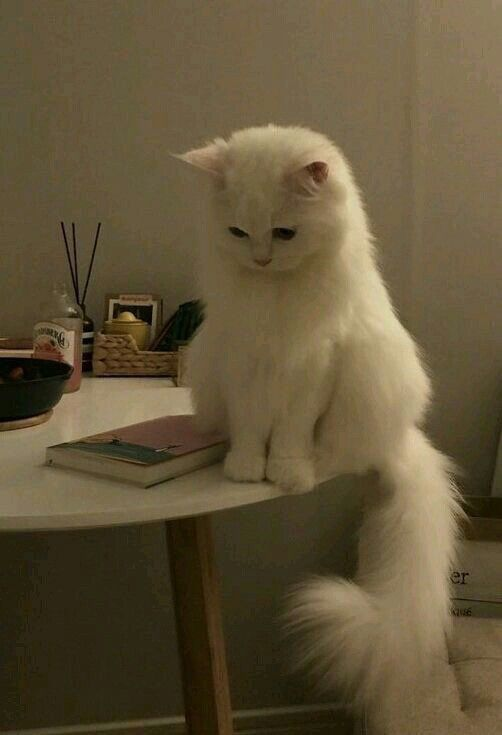

In [26]:
image = cv2.imread(first_file)

cv2_imshow(image)

Proszę zwrócić uwagę, że wczytany w ten sposób obrazek jest formatu numpy.ndarray, który poznaliśmy już wcześniej.

Tablica przechowująca jego treść ma trzy wymiary. Możemy to sobie wyobrazić jako trzy dwuwymiarowe tablice, przechowujące niezależnie jasności pikseli dla odpowiednich składowych RGB, koncepcja znana z zadania GRK MP2.

In [27]:
print(type(image))
image.shape

<class 'numpy.ndarray'>


(735, 502, 3)

Więcej informacji na temat reprezentacji obrazu w bibliotece OpenCV znajduje się w dokumentacji: https://docs.opencv.org/4.x/d3/df2/tutorial_py_basic_ops.html

# Zadanie na 4 - Konwersja obrazu do skali szarości

Korzystając z wyżej opisanych mechanizmów, i zapoznawszy się z dokumentacją OpenCV (https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html) wczytaj obrazek z dysku lokalnego, skonwertuj go do skali szarości i wyświetl w Jupyter Notebook.

Saving cute cat.jpg to cute cat (1).jpg
Uploaded file: cute cat (1).jpg


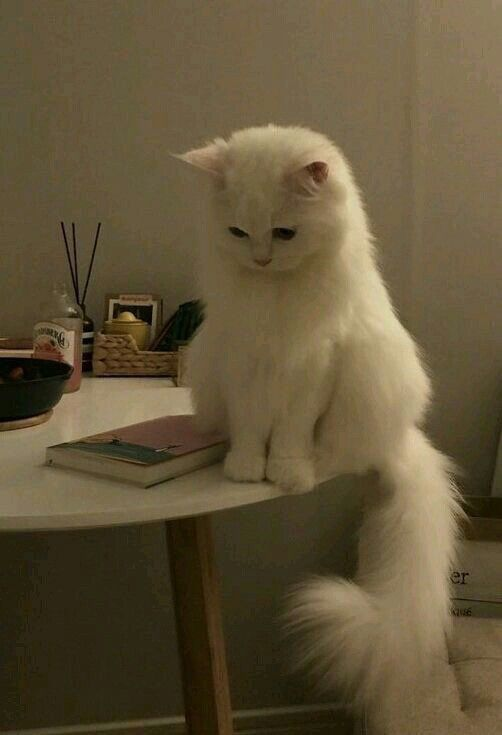

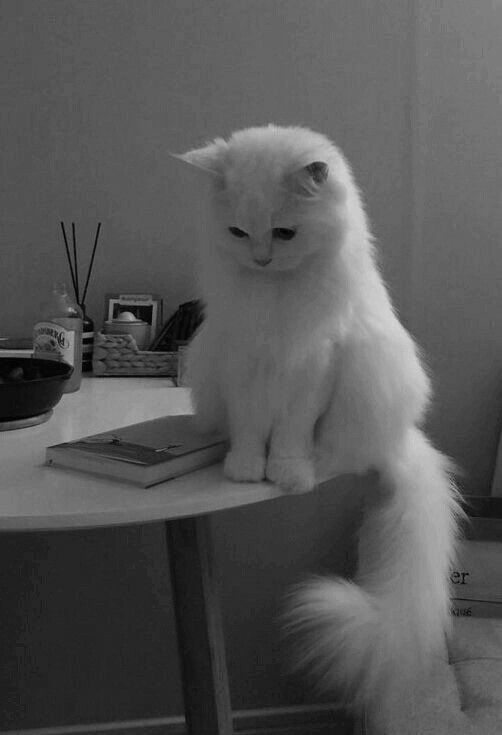

In [29]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

uploaded = files.upload()

file_names = list(uploaded.keys())
if len(file_names) > 0:
    first_file = file_names[0]
    print("Uploaded file:", first_file)
else:
    print("No file uploaded.")

image = cv2.imread(first_file)

cv2_imshow(image)


if image is not None:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    cv2_imshow(gray_image)
else:
    print("Błąd wczytywania obrazu.")


# Zadanie na 4.5 - Histogram

Korzystając z wiedzy zebranej przy okazji MP2, napisz własną funkcję liczącą histogram dla obrazka w skali szarości i zaprezentuj wynik jej działania (wykres nie jest potrzebny).

Porównaj wynik otrzymany ze swojej funkcji z wynikiem funkcji bibliotecznej *cv2.calcHist*.

Saving cute cat.jpg to cute cat (6).jpg
Uploaded file: cute cat (6).jpg


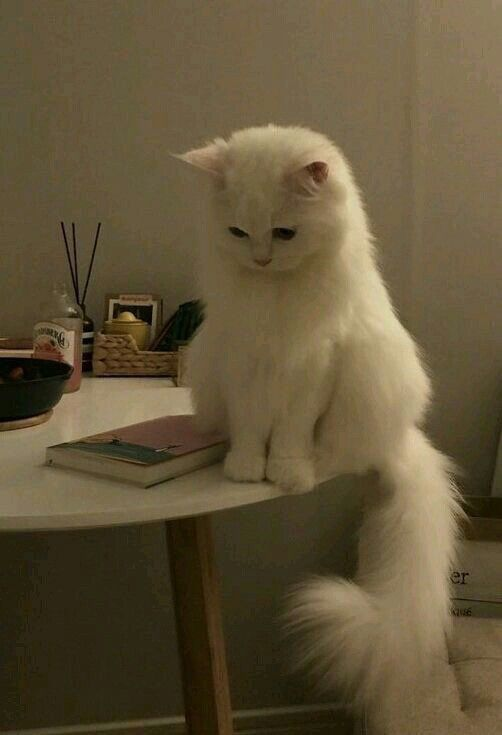

Obraz nie jest w skali szarości.
Wynik własnej funkcji histogramu:
None

Wynik funkcji cv2.calcHist:
[[3.5350e+03]
 [1.4930e+03]
 [1.4800e+03]
 [1.6050e+03]
 [1.6540e+03]
 [1.4470e+03]
 [1.3720e+03]
 [1.2090e+03]
 [1.4090e+03]
 [1.5190e+03]
 [1.9710e+03]
 [2.1620e+03]
 [2.7110e+03]
 [3.3640e+03]
 [2.2810e+03]
 [2.3870e+03]
 [2.7270e+03]
 [3.4970e+03]
 [5.3830e+03]
 [7.2060e+03]
 [1.0827e+04]
 [4.5220e+03]
 [3.1750e+03]
 [2.2090e+03]
 [1.9270e+03]
 [2.0880e+03]
 [2.2740e+03]
 [2.3210e+03]
 [2.4660e+03]
 [2.5430e+03]
 [2.0390e+03]
 [1.7790e+03]
 [1.6570e+03]
 [1.9500e+03]
 [1.7940e+03]
 [1.8540e+03]
 [1.8320e+03]
 [1.9350e+03]
 [1.7830e+03]
 [1.7670e+03]
 [1.8750e+03]
 [1.9090e+03]
 [2.0810e+03]
 [2.2680e+03]
 [2.4920e+03]
 [2.5630e+03]
 [2.8500e+03]
 [2.4940e+03]
 [2.6510e+03]
 [3.0850e+03]
 [3.6870e+03]
 [4.9480e+03]
 [4.5080e+03]
 [5.5650e+03]
 [4.9480e+03]
 [4.6030e+03]
 [5.2340e+03]
 [7.2290e+03]
 [7.9690e+03]
 [8.8820e+03]
 [8.5700e+03]
 [8.5290e+03]
 [8.9450e+03]
 [6.3520e+03]
 [5

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def calculate_histogram(image):
    if len(image.shape) > 2:
        print("Obraz nie jest w skali szarości.")
        return None

    histogram = np.zeros((256,), dtype=int)

    for pixel_value in image.ravel():
        histogram[pixel_value] += 1

    return histogram


uploaded = files.upload()

file_names = list(uploaded.keys())
if len(file_names) > 0:
    first_file = file_names[0]
    print("Uploaded file:", first_file)
else:
    print("No file uploaded.")

image = cv2.imread(first_file)

cv2_imshow(image)

if image is not None:
    custom_histogram = calculate_histogram(image)

    cv2_histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    print("Wynik własnej funkcji histogramu:")
    print(custom_histogram)

    print("\nWynik funkcji cv2.calcHist:")
    print(cv2_histogram)
else:
    print("Błąd wczytywania obrazu.")


# Zadanie na 5 - Podobieństwa obrazów na podstawie porównania histogramów

Przeczytaj:

https://mpatacchiola.github.io/blog/2016/11/12/the-simplest-classifier-histogram-intersection.html

Przygotuj i wgraj do przestrzeni roboczej kilka obrazów, spełniających następujące kryteria:
 - Trzy wersje jednego obrazka, jeden prosty, jeden obrócony o 20 stopnie, jeden obrócony o 180 stopni
 - Trzy wersje drugiego obrazka, jeden prosty, jeden obrócony o 45, jeden obrócony o 180 stopni

Do przygotowania obrazów można wykorzystać dowolne oprogramowanie do manipulacji grafiką.

Nastepnie, za pomocą funkcji bibliotecznej *cv2.calcHist.* oblicz histogramy dla każdego z nich, a następnie porównaj je macierzowo (każdy z każdym) za pomocą funkcji *cv2.compareHist*.

Jak działa to porównanie?



Saving zpr_dzienne_11c_03_04-wbs-podzial.jpg to zpr_dzienne_11c_03_04-wbs-podzial.jpg


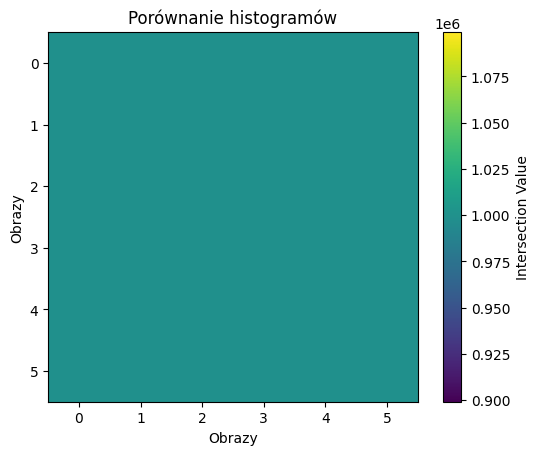

In [37]:
# Tutaj państwa rozwiązanie, które wczytuje 6 obrazów w wersjach jak powyżej, dokonuje niezbędnych
# obliczeń i prezentuje wyniki.
